In [15]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

import gensim
import nltk

In [12]:
url="amazon_reviews_big.csv"
reviews=pd.read_csv(url)
reviews.shape

(100000, 8)

In [13]:
reviews.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09


In [14]:
docs=reviews['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.shape

(100000,)

In [45]:
stopwords=nltk.corpus.stopwords.words('english')

custom_stopwords=['','use','one','great','work','like','get','user']
stopwords.extend(custom_stopwords)

stemmer=nltk.stem.PorterStemmer()
def clean_sentence(text):
    return [stemmer.stem(word) for word in text.split(' ') if word not in stopwords]
docs_clean=docs.apply(clean_sentence)

In [46]:
docs_clean.head()

0    [reciev, pictur, advert, vidio, cabl, job, nee...
1    [excel, unit, pretti, simpl, instal, use, wire...
2    [im, enjoy, keyboard, im, get, anoth, laptop, ...
3    [overal, fantast, camera, im, extrem, pleas, w...
4    [well, mysamsung, pnd, inch, p, hz, plasma, hd...
Name: reviewText, dtype: object

In [47]:
dictionary=gensim.corpora.Dictionary(docs_clean)
dictionary

In [48]:
dictionary[1],dictionary[4]

('amazoncom', 'back')

In [49]:
[(key, value) for key, value in dictionary.items()]

[(0, 'advert'),
 (1, 'amazoncom'),
 (2, 'anyth'),
 (3, 'attempt'),
 (4, 'back'),
 (5, 'bait'),
 (6, 'buy'),
 (7, 'cabl'),
 (8, 'cheap'),
 (9, 'claim'),
 (10, 'contact'),
 (11, 'els'),
 (12, 'enough'),
 (13, 'find'),
 (14, 'flimsi'),
 (15, 'full'),
 (16, 'give'),
 (17, 'gold'),
 (18, 'good'),
 (19, 'grade'),
 (20, 'high'),
 (21, 'im'),
 (22, 'item'),
 (23, 'job'),
 (24, 'kareoke'),
 (25, 'know'),
 (26, 'list'),
 (27, 'look'),
 (28, 'mistak'),
 (29, 'need'),
 (30, 'order'),
 (31, 'pictur'),
 (32, 'plate'),
 (33, 'product'),
 (34, 'qualiti'),
 (35, 'reciev'),
 (36, 'refund'),
 (37, 'run'),
 (38, 'seller'),
 (39, 'sender'),
 (40, 'sent'),
 (41, 'still'),
 (42, 'surpris'),
 (43, 'switch'),
 (44, 'thin'),
 (45, 'thing'),
 (46, 'told'),
 (47, 'tv'),
 (48, 'vidio'),
 (49, 'wife'),
 (50, 'woth'),
 (51, 'would'),
 (52, 'adapt'),
 (53, 'also'),
 (54, 'anoth'),
 (55, 'bend'),
 (56, 'bode'),
 (57, 'car'),
 (58, 'cd'),
 (59, 'correctli'),
 (60, 'dash'),
 (61, 'easi'),
 (62, 'even'),
 (63, 'evid'),
 

In [50]:
docs_bows=[] # docs to bag of words
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bows.append(bow)

In [51]:
model=gensim.models.LdaModel(docs_bows, id2word=dictionary, num_topics=4)
model

In [52]:
model.get_document_topics(docs_bows[0])
#document to topic relationship

[(2, 0.25038868), (3, 0.74122196)]

In [53]:
model.print_topics()
#topic to word relationship

[(0,
  '0.034*"camera" + 0.015*"len" + 0.011*"pictur" + 0.008*"use" + 0.007*"take" + 0.007*"qualiti" + 0.007*"good" + 0.007*"light" + 0.007*"video" + 0.007*"canon"'),
 (1,
  '0.018*"case" + 0.009*"fit" + 0.008*"well" + 0.008*"keyboard" + 0.008*"would" + 0.007*"use" + 0.007*"ipad" + 0.007*"look" + 0.006*"good" + 0.006*"work"'),
 (2,
  '0.011*"drive" + 0.009*"work" + 0.008*"use" + 0.007*"usb" + 0.007*"card" + 0.007*"comput" + 0.006*"devic" + 0.006*"connect" + 0.006*"time" + 0.006*"problem"'),
 (3,
  '0.016*"sound" + 0.012*"cabl" + 0.010*"good" + 0.009*"tv" + 0.009*"speaker" + 0.008*"batteri" + 0.008*"qualiti" + 0.007*"work" + 0.007*"charg" + 0.006*"price"')]

In [64]:
df_topic_word=pd.DataFrame(model.get_document_topics(docs_bows[1]),columns=['topic','prob'])
print(df_topic_word.sort_values('prob',ascending=False).iloc[0]['topic'])
print(df_topic_word)

1.0
   topic      prob
0      0  0.071841
1      1  0.397375
2      2  0.162787
3      3  0.367997


In [63]:
topics=[]
for doc in docs_bows:
    df_topic_word=pd.DataFrame(model.get_document_topics(doc),columns=['topic','prob'])
    curr_topic=df_topic_word.sort_values('prob',ascending=False).iloc[0]['topic']
    topics.append(curr_topic)

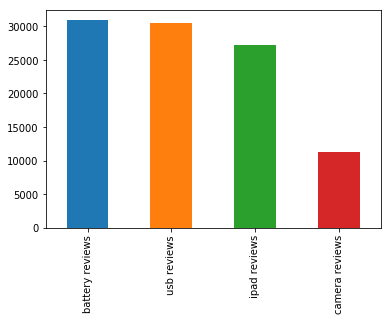

In [68]:
reviews['topic']=topics
topic_names={0:'camera reviews',1:'ipad reviews',2:'usb reviews',3:'battery reviews'}
reviews['topic']=reviews['topic'].replace(topic_names)
reviews['topic'].value_counts().plot.bar()

### Web Scraping

In [69]:
from selenium import webdriver

In [71]:
url='https://en.wikipedia.org/wiki/Data_science'
browser=webdriver.Chrome('chromedriver.exe')
browser.get(url)

In [77]:
para_tags=browser.find_elements_by_css_selector('p')
for para in para_tags:
    print (para.text)

Wiki Loves Love: Documenting festivals and celebrations of love on Commons.
Help Wikimedia and win prizes by sending photos.

Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured,[1][2] similar to data mining.
Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data.[3] It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science.
Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.[4][5]
In 2012, when Harvard Business Review cal

In an effort similar to Dhar's, Stanford professor David Donoho, in September 2015, takes the proposition further by rejecting three simplistic and misleading definitions of data science in lieu of criticisms.[32] First, for Donoho, data science does not equate to big data, in that the size of the data set is not a criterion to distinguish data science and statistics.[32] Second, data science is not defined by the computing skills of sorting big data sets, in that these skills are already generally used for analyses across all disciplines.[32] Third, data science is a heavily applied field where academic programs right now do not sufficiently prepare data scientists for the jobs, in that many graduate programs misleadingly advertise their analytics and statistics training as the essence of a data science program.[32][33] As a statistician, Donoho, following many in his field, champions the broadening of learning scope in the form of data science,[32] like John Chambers who urges statis

In [79]:
text=' '.join([para.text for para in para_tags])
text

'Wiki Loves Love: Documenting festivals and celebrations of love on Commons.\nHelp Wikimedia and win prizes by sending photos.  Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from data in various forms, both structured and unstructured,[1][2] similar to data mining. Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data.[3] It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.[4][5] In 2012, when Harvard Business Review c

In [91]:
browser.get('http://www.zomato.com/ncr/great-food-no-bull')

In [92]:
res_tags=browser.find_elements_by_css_selector('div.top-res-box')
len(res_tags)

210

In [97]:
restaurants=pd.DataFrame()
for res in res_tags:
    try:
        name=res.find_element_by_css_selector('div.res_title').text
        url=res.find_element_by_css_selector('a[data-link-type="restaurant"]').get_attribute('href')
        #print(name,url)
        restaurants= restaurants.append({'name':name, 'url':url}, ignore_index=True)
    except:
        pass
restaurants.head()

,name,url
0,Punjabi Angithi,https://www.zomato.com/ncr/punjabi-angithi-pas...
1,Punter House Cafe Reloaded,https://www.zomato.com/ncr/punter-house-cafe-r...
2,Mrs & Mr Yummy,https://www.zomato.com/ncr/mrs-mr-yummy-sector...
3,Meatatarian,https://www.zomato.com/ncr/meatatarian-south-c...
4,Tikka Junction Courtyard,https://www.zomato.com/ncr/tikka-junction-cour...


In [108]:
reviews=pd.DataFrame(columns=['res_name','user_name','review','rating'])

for index, row in restaurants.head(10).iterrows():
    res_name=row['name']
    res_url=row['url']
    browser.get(res_url)
    reviews_tags=browser.find_elements_by_css_selector('div.ui.segment.clearfix.brtop')
    #print(len(reviews_tags))
    
    for reviews_tag in reviews_tags:
        rev_name=reviews_tag.find_element_by_css_selector('a[data-entity_id]').text
        text_tag=reviews_tag.find_element_by_css_selector('div.rev-text')
        review_text=text_tag.text
        rating=text_tag.find_element_by_css_selector('div[aria-label]').get_attribute('aria-label')
        #print(rev_name,'\n',rating,'\n', review_text)
        #print('-------------------------------')
        
        reviews=reviews.append({'res_name':res_name,'user_name':rev_name,
                               'review':review_text,'rating':rating}, ignore_index=True)
        
reviews

,res_name,user_name,review,rating
0,Punjabi Angithi,Street Food Connoisseur,RATED\n I ordered dinner from this place toda...,Rated 5.0
1,Punjabi Angithi,Sonal Malhotra,RATED\n Amazing is just the word to summarise...,Rated 5.0
2,Punjabi Angithi,Rahul Chuttani,RATED\n Had an amazing food delivered from th...,Rated 5.0
3,Punjabi Angithi,Priyanka Goyal,,Rated 5.0
4,Punjabi Angithi,Delhi Wagon,RATED\n One of the perfect places for the veg...,Rated 5.0
5,Punjabi Angithi,Deepakshi,RATED\n Last night as we were so hungry so we...,Rated 5.0
6,Punjabi Angithi,Palak Mahana,RATED\n Punjabi angithi is a very famous rest...,Rated 5.0
7,Punjabi Angithi,Nipun Charaya (Thechatora),RATED\n Tried this new outlet and loved the f...,Rated 5.0
8,Punjabi Angithi,Srishti Tandon,RATED\n A perfect place to have Yummy north i...,Rated 5.0
9,Punter House Cafe Reloaded,Juhi Goel,RATED\n Gravy named saag bala bakra and this ...,Rated 5.0


In [116]:
reviews=pd.DataFrame(columns=['res_name','user_name','review','rating'])

for index, row in restaurants.head(1).iterrows():
    res_name=row['name']
    res_url=row['url']
    browser.get(res_url)
    import time
    for i in range(5):
        try: 
            browser.find_element_by_css_selector('div.load-more').click()
            time.sleep(3)
        except Exception as error:
            print(error)
            break
    
    reviews_tags=browser.find_elements_by_css_selector('div.ui.segment.clearfix.brtop')
    print(len(reviews_tags))
    
    for reviews_tag in reviews_tags:
        rev_name=reviews_tag.find_element_by_css_selector('a[data-entity_id]').text
        text_tag=reviews_tag.find_element_by_css_selector('div.rev-text')
        review_text=text_tag.text
        rating=text_tag.find_element_by_css_selector('div[aria-label]').get_attribute('aria-label')
        #print(rev_name,'\n',rating,'\n', review_text)
        #print('-------------------------------')
        
        reviews=reviews.append({'res_name':res_name,'user_name':rev_name,
                               'review':review_text,'rating':rating}, ignore_index=True)
        
reviews

29


,res_name,user_name,review,rating
0,Punjabi Angithi,Street Food Connoisseur,RATED\n I ordered dinner from this place toda...,Rated 5.0
1,Punjabi Angithi,Sonal Malhotra,RATED\n Amazing is just the word to summarise...,Rated 5.0
2,Punjabi Angithi,Rahul Chuttani,RATED\n Had an amazing food delivered from th...,Rated 5.0
3,Punjabi Angithi,Priyanka Goyal,,Rated 5.0
4,Punjabi Angithi,Delhi Wagon,RATED\n One of the perfect places for the veg...,Rated 5.0
5,Punjabi Angithi,Deepakshi,RATED\n Last night as we were so hungry so we...,Rated 5.0
6,Punjabi Angithi,Palak Mahana,RATED\n Punjabi angithi is a very famous rest...,Rated 5.0
7,Punjabi Angithi,Nipun Charaya (Thechatora),RATED\n Tried this new outlet and loved the f...,Rated 5.0
8,Punjabi Angithi,Srishti Tandon,RATED\n A perfect place to have Yummy north i...,Rated 5.0
9,Punjabi Angithi,Shubham,RATED\n Punjabi angethi Is an amazing place w...,Rated 5.0
